Best Path: [1, 6, 3, 9, 5, 4, 7, 2, 8, 0, 1]
Best Length: 29.24509875943449


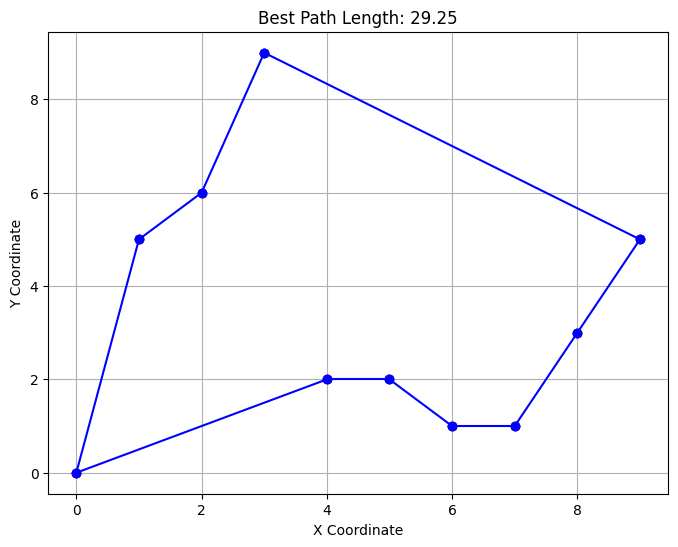

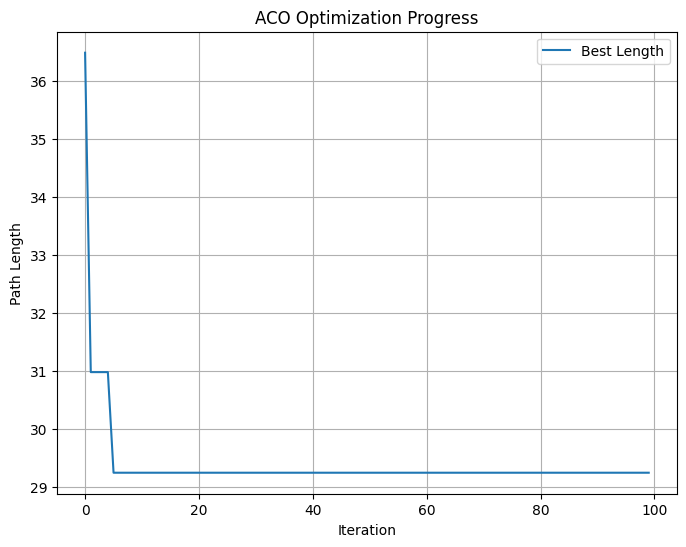

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# 定义城市坐标
cities = np.array([
    [0, 0], [1, 5], [5, 2], [3, 9], [7, 1],
    [8, 3], [2, 6], [6, 1], [4, 2], [9, 5]
])

num_cities = len(cities)
distance_matrix = np.linalg.norm(cities[:, np.newaxis, :] - cities[np.newaxis, :, :], axis=2)

# ACO 参数
num_ants = 5            # 蚂蚁数量
num_iterations = 100     # 迭代次数
alpha = 1.0              # 信息素重要程度
beta = 5.0               # 启发因子重要程度
rho = 0.5                # 信息素蒸发率
Q = 100                  # 信息素常数

# 初始化信息素矩阵
pheromone = np.ones((num_cities, num_cities))

# 计算启发因子（距离的倒数）
eta = 1 / (distance_matrix + np.diag([np.inf] * num_cities))
#对角线上自己到自己的距离为0，取倒数会产生错误，故需要加一个np.diag([np.inf] * num_cities)

best_path = None
best_length = np.inf
best_lengths = []  # 用于记录每代的最优解

# ACO 主循环
for iteration in range(num_iterations):
    all_paths = []
    all_lengths = []

    for ant in range(num_ants):
        # 随机选择起点
        start = np.random.randint(num_cities)
        unvisited = list(range(num_cities))
        unvisited.remove(start)
        path = [start]

        # 构造路径
        while unvisited:
            current_city = path[-1]
            probabilities = []

            for next_city in unvisited:
                tau = pheromone[current_city][next_city] ** alpha
                heur = eta[current_city][next_city] ** beta
                probabilities.append(tau * heur)

            probabilities = np.array(probabilities)
            probabilities /= probabilities.sum()
            
            next_city = np.random.choice(unvisited, p=probabilities)
            path.append(next_city)
            unvisited.remove(next_city)

        path.append(start)  # 回到起点
        all_paths.append(path)

        # 计算路径长度
        length = sum(distance_matrix[path[i]][path[i + 1]] for i in range(num_cities))
        all_lengths.append(length)

        # 更新全局最优解
        if length < best_length:
            best_length = length
            best_path = path

    best_lengths.append(best_length)

    # 信息素更新
    pheromone *= (1 - rho)  # 信息素蒸发
    for i in range(num_ants):
        for j in range(num_cities):
            from_city = all_paths[i][j]
            to_city = all_paths[i][j + 1]
            pheromone[from_city][to_city] += Q / all_lengths[i]
            pheromone[to_city][from_city] += Q / all_lengths[i]  # 无向图对称更新

# 输出最优解
print("Best Path:", best_path)
print("Best Length:", best_length)


# 绘制最短路径
plt.figure(figsize=(8, 6))
for i in range(len(best_path) - 1):
    from_city = cities[best_path[i]]
    to_city = cities[best_path[i + 1]]
    plt.plot([from_city[0], to_city[0]], [from_city[1], to_city[1]], 'b-o')

plt.title(f"Best Path Length: {best_length:.2f}")
plt.scatter(cities[:, 0], cities[:, 1], color='red')
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True)
plt.show()

# 绘制路径长度随迭代次数变化
plt.figure(figsize=(8, 6))
plt.plot(best_lengths, label='Best Length')
plt.xlabel('Iteration')
plt.ylabel('Path Length')
plt.title('ACO Optimization Progress')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
'''
每一次迭代，（都会有num_ants只蚂蚁，每只各爬出一个path，根据这些path更新信息素），然后再在新的迭代中
重复（）里的内容吗？
'''

'\n每一次迭代，（都会有num_ants只蚂蚁，每只各爬出一个path，根据这些path更新信息素），然后再在新的迭代中\n重复（）里的内容吗？\n'